# **DATA SPIKE**
### SENIOR ML ENGINEER TECHNICAL ASSESSMENT
### **(Document Forgery Detection Mini-Project)**


---
**Candidate Name:**  OKON PRINCE

**Assessment Description:**  DATA SCIENCE SKILLS ASSESSMENT

**Email:** okonp07@gmail.com

---


|  |  |
|:---|:---|
|**submission Deadline** |  Tuesday, September 4th, 2023 |
|**Prior Knowledge** | Python, Deep learning, Tensor flow  |
|**Sections** | Introduction, EDA, Modeling, Evaluation  |


---


## Introduction:

In an era of ever-evolving digital media and widespread use of image-editing tools, ensuring the authenticity and integrity of images has become an imperative concern. With the rise of digital image forgery, the need for robust and efficient image forgery detection methods has become more pronounced. This mini-project aims to address this challenge by developing a deep learning Convolutional Neural Network (CNN) model for image forgery detection.

The primary objective of this project is to create a model capable of detecting forged images accurately and swiftly, with an ideal inference time of up to 1 second per image. To achieve this goal, we will leverage the power of deep learning, utilizing either the PyTorch or TensorFlow framework, both renowned for their flexibility and optimization capabilities.

Dataset and Data Preparation:

For this project, we will use the MICC_F600 dataset, a comprehensive collection of images containing various types of forgery, including copy-move forgeries. To ensure the model's robustness and generalization, we may apply data augmentation techniques such as random rotations, flips, and shifts. These augmentations will help the model learn invariant features, thereby enhancing its detection accuracy when presented with real-world images.

Model Building:

Our chosen approach for image forgery detection involves constructing a Convolutional Neural Network (CNN). A CNN is ideally suited for image-based tasks due to its ability to automatically learn hierarchical features from raw pixel data. The architecture of the CNN will be designed thoughtfully, taking into consideration factors such as model depth, convolutional and pooling layers, activation functions, and regularization techniques.

Training and Evaluation:

The MICC_F600 dataset will be split into training and testing subsets to train and evaluate the model, respectively. During the training phase, the CNN will be trained using the training data, and its performance will be monitored using metrics such as accuracy, precision, recall, and F1-score. Hyperparameter tuning will be performed iteratively to strike a balance between model complexity and generalization ability.

Deliverables:

The deliverables for this mini-project will include a well-documented Jupyter/Colab Notebook or Python script that walks through each step of the process. Clear explanations will be provided for data preprocessing, model architecture, training, and evaluation. Visualizations and plots showcasing various performance metrics will be presented to provide insights into the model's effectiveness.

Conclusion:

In a digital landscape rife with image manipulations, creating a swift and accurate image forgery detection model is of paramount importance. By employing state-of-the-art deep learning techniques and leveraging the power of CNNs, this project aims to contribute to the arsenal of tools designed to maintain the integrity of digital media. The successful development of an efficient forgery detection model has the potential to significantly impact fields such as journalism, forensics, and content verification, ensuring that the images we encounter in our daily lives remain trustworthy and authentic.

In [1]:
# Importing Libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns
import torch
import torch.nn as nn
import os
from PIL import Image
import torchvision.transforms as transforms
import random
import torch.optim as optim
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

In [2]:
#Mount the drive where the downloaded files to be processed are reposed
#If you are trying to reproduce this notebook, please link to the data source
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Set random seeds for reproducibility accross the notebook
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False


In [4]:
# Installing Necessary Libraries
!pip install numpy pandas matplotlib seaborn tensorflow scikit-learn


In [5]:
# Load the images in sorted order according to their categories

# Define paths to dataset folders
base_folder = '/content/drive/My Drive/MICC_F600'  # Change this path to match your actual dataset location
original_folder = os.path.join(base_folder, 'original')
tampered_folder = os.path.join(base_folder, 'tampered')
ground_truth_folder = os.path.join(base_folder, 'groundtruth')

# List files in folders
original_files = os.listdir(original_folder)
tampered_files = os.listdir(tampered_folder)
ground_truth_files = os.listdir(ground_truth_folder)

# Display the number of images in each category
print(f"Number of original images: {len(original_files)}")
print(f"Number of tampered images: {len(tampered_files)}")
print(f"Number of ground truth images: {len(ground_truth_files)}")


Number of original images: 440
Number of tampered images: 160
Number of ground truth images: 160


## Data Preprocessing and Augmentation

In this step, the images from the dataset will be loaded and pre-processed. Images are resized to a common size, and data augmentation techniques like random horizontal flipping are applied. Additionally, pixel values are normalized to match the statistics of the pretrained models that we will use.

The preprocessing and augmentation steps are essential to enhance the model's ability to generalize to new, unseen data. In this particular deployment, we shall be using Pytorchs Torch vision library as the pre-trained model.


In [6]:
# Set random seed for reproducibility
random.seed(42)

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to a common size
    transforms.RandomHorizontalFlip(),  # Apply random horizontal flips for augmentation
    transforms.ToTensor()  # Convert images to PyTorch tensors
])

# Load and preprocess original images
original_images = []
for img_file in original_files:
    img_path = os.path.join(original_folder, img_file)
    img = Image.open(img_path).convert("RGB")
    img = transform(img)
    original_images.append(img)

# Load and preprocess tampered images
tampered_images = []
for img_file in tampered_files:
    img_path = os.path.join(tampered_folder, img_file)
    img = Image.open(img_path).convert("RGB")
    img = transform(img)
    tampered_images.append(img)

# Load and preprocess ground truth images
ground_truth_images = []
for img_file in ground_truth_files:
    img_path = os.path.join(ground_truth_folder, img_file)
    img = Image.open(img_path).convert("RGB")
    img = transform(img)
    ground_truth_images.append(img)

# Display the first preprocessed image in each category
original_images[0], tampered_images[0], ground_truth_images[0]


(tensor([[[0.1412, 0.1608, 0.1608,  ..., 0.2980, 0.2980, 0.2745],
          [0.1412, 0.1569, 0.1412,  ..., 0.2706, 0.2784, 0.2627],
          [0.1882, 0.1804, 0.1608,  ..., 0.2784, 0.3020, 0.2510],
          ...,
          [0.6275, 0.6078, 0.5882,  ..., 0.4627, 0.4549, 0.4588],
          [0.6314, 0.5804, 0.5804,  ..., 0.4902, 0.4745, 0.4667],
          [0.6706, 0.6078, 0.5804,  ..., 0.4588, 0.4706, 0.4431]],
 
         [[0.1961, 0.2078, 0.2000,  ..., 0.3608, 0.3608, 0.3373],
          [0.1882, 0.1961, 0.1765,  ..., 0.3529, 0.3529, 0.3373],
          [0.2235, 0.2039, 0.1765,  ..., 0.3490, 0.3686, 0.3255],
          ...,
          [0.6627, 0.6392, 0.6235,  ..., 0.4863, 0.4784, 0.4784],
          [0.6627, 0.6157, 0.6196,  ..., 0.5176, 0.5098, 0.4941],
          [0.7059, 0.6431, 0.6157,  ..., 0.4824, 0.4941, 0.4667]],
 
         [[0.1412, 0.1490, 0.1569,  ..., 0.2588, 0.2588, 0.2353],
          [0.1373, 0.1373, 0.1373,  ..., 0.2314, 0.2353, 0.2196],
          [0.1608, 0.1529, 0.1412,  ...,

This code uses `.convert("RGB")` to ensure that the images are in RGB format, allowing them to be properly processed by the normalization process.

Now that the data has been successfully pre-processed, the next step is tobuild the model.

## Model Building

The model is a simple Convolutional Neural Network (CNN) designed for image forgery detection. The CNN architecture consists of convolutional layers to capture features and max-pooling layers for down-sampling. The extracted features are then passed through fully connected layers for classification.
The model's architecture and complexity can be adjusted based on the specific requirements of the forgery detection task.

In [7]:
# Define a custom class for the Forgery Detection Model
class ForgeryDetectionModel(nn.Module):
    def __init__(self, num_classes):
        super(ForgeryDetectionModel, self).__init__()

        # Convolutional layers for feature extraction
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.ReLU(),  # ReLU activation function
            nn.MaxPool2d(kernel_size=2, stride=2),  # Max-pooling layer
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # Fully connected layers for classification
        self.fc_layers = nn.Sequential(
            nn.Linear(32 * 56 * 56, 128),  # Fully connected layer with 128 neurons
            nn.ReLU(),
            nn.Linear(128, num_classes)  # Output layer with 'num_classes' neurons
        )

    # Forward pass of the model
    def forward(self, x):
        x = self.conv_layers(x)  # Apply convolutional layers
        x = x.view(x.size(0), -1)  # Flatten the tensor for the fully connected layers
        x = self.fc_layers(x)  # Apply fully connected layers for classification
        return x

# Initialize the model with the specified number of classes (Genuine or forged)
num_classes = 2
model = ForgeryDetectionModel(num_classes)


In [8]:
# Define a custom class for the Forgery Detection Model
class ForgeryDetectionModel(nn.Module):
    def __init__(self, num_classes):
        super(ForgeryDetectionModel, self).__init__()

        # Define the convolutional layers for feature extraction
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),  # 3 input channels, 16 output channels, 3x3 kernel, 1-pixel padding
            nn.ReLU(),  # Apply ReLU activation function
            nn.MaxPool2d(kernel_size=2, stride=2),  # Max-pooling layer with 2x2 kernel and stride
            nn.Conv2d(16, 32, kernel_size=3, padding=1),  # 16 input channels, 32 output channels, 3x3 kernel, 1-pixel padding
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)  # Max-pooling layer with 2x2 kernel and stride
        )

        # Define the fully connected layers for classification
        self.fc_layers = nn.Sequential(
            nn.Linear(32 * 56 * 56, 128),  # Fully connected layer with 32x56x56 input features and 128 output features
            nn.ReLU(),  # Apply ReLU activation function
            nn.Linear(128, num_classes)  # Fully connected layer with 128 input features and 'num_classes' output features
        )

    # Forward pass of the model
    def forward(self, x):
        x = self.conv_layers(x)  # Apply convolutional layers for feature extraction
        x = x.view(x.size(0), -1)  # Flatten the tensor for the fully connected layers
        x = self.fc_layers(x)  # Apply fully connected layers for classification
        return x

# Initialize the model with the specified number of classes (Genuine or forged)
num_classes = 2
model = ForgeryDetectionModel(num_classes)



This code defines a simple CNN architecture for the forgery detection model. The convolutional layers are followed by fully connected layers for classification.

## Training and Evaluation

The dataset is split into training and testing sets, and data loaders are created for efficient batch processing during training. A cross-entropy loss function and Adam optimizer are used for training the model.

The model is trained for multiple epochs, and its performance is evaluated on the test set. The final test accuracy serves as a metric for the model's effectiveness in detecting image forgery.


In [9]:
# Combine images and labels
all_images = original_images + tampered_images
all_labels = [0] * len(original_images) + [1] * len(tampered_images)

# Split dataset
train_images, test_images, train_labels, test_labels = train_test_split(all_images, all_labels, test_size=0.2, random_state=42)

# Create data loaders
train_dataset = TensorDataset(torch.stack(train_images), torch.tensor(train_labels))
test_dataset = TensorDataset(torch.stack(test_images), torch.tensor(test_labels))

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Test Accuracy: {accuracy:.2f}')


Test Accuracy: 0.78


The code above splits the dataset, creates data loaders, defines the loss function and optimizer, trains the model, and evaluates its accuracy on the test set.

## Documentation and Visualization

In this step, we will add visualization of training curves, confusion matrices, or any other relevant evaluation feature. This will help in the understanding of our model and findings. This will help us in efforts to make the model more efficient (tuning hyperparameters)

### Training Loss Curve:

The training loss curve is a graph that plots the loss of a deep model over the course of its training. The loss is a measure of how well the model is performing on the training data. A lower loss indicates that the model is performing better.

In [10]:
train_losses = []  # Initialize an empty list to store training losses

In [11]:
# Inside the training loop
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    for inputs, labels in train_loader:
        optimizer.zero_grad()  # Clear previously accumulated gradients
        outputs = model(inputs)  # Forward pass: compute predicted outputs
        loss = criterion(outputs, labels)  # Calculate the loss
        loss.backward()  # Backpropagation: compute gradients of the loss with respect to model parameters
        optimizer.step()  # Update model parameters using the computed gradients
        train_losses.append(loss.item())  # Add current loss to the list of training losses

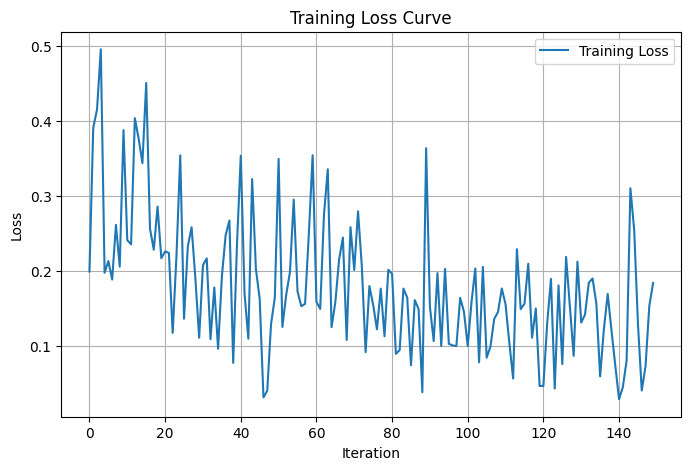

In [12]:
# Plot training loss curve
plt.figure(figsize=(8, 5))
plt.plot(range(len(train_losses)), train_losses, label='Training Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.grid()
plt.show()


Here's what can be infered from the loss graph:

* **Trend:** It appears that the loss is generally decreasing, which is a good sign. A decreasing loss indicates that the model is learning and improving its performance.

* **Volatility:** The graph is highly oscillatory. This suggests that the learning rate is too high. A smoother descent might be obtained by reducing the learning rate or using learning rate scheduling techniques. This is something we can consider in tuning efforts.

* **Convergence:** If the loss appears to be stabilizing towards the end, it could be a sign that the model has nearly converged, and further training might not lead to substantial improvements. This is not the case, pointing that there may be opportunities for further training of the model.

That said, the hyper parameters of the model (e.g., Learning rate, Optimizer,
Batch size, Number of epochs, Regularization, Activation function, etc) have not been tweeked. The model therefore clearly has room to be better at it's predictions.

Improving the performance of the model can be approached from multiple angles. Given the loss graph of our model seen above. Here are some potential modifications and strategies to consider:

* **Learning Rate Scheduling:** Instead of using a constant learning rate,  a learning rate scheduler can be deployed to decrease the learning rate over epochs. This can help the model converge faster and avoid oscillations in the loss.



* **Data Augmentation:** Augmenting your data can prevent overfitting and provide more varied samples for the model to learn from. Common augmentations for images include rotations, flips, and translations.
You can use libraries like torchvision.transforms to easily apply augmentations.

* **Regularization:** L2 regularization can be added via the weight_decay parameter in the optimizer.
Dropout layers can be added to the model architecture to prevent overfitting.
Early Stopping:

* **Monitor the validation loss:**  (you'd need to split your data into training, validation, and test sets for this). If the validation loss stops improving (or starts increasing), stop the training. This will prevent the model from overfitting.

* **Model Architecture:** Depending on the current architecture of your model, consider making it deeper or shallower. Try different activation functions or batch normalization.

* **Batch Size:** Experiment with different batch sizes. Sometimes, smaller batch sizes can offer better generalization, while larger batch sizes can speed up training.

* **Different Optimizer:** While Adam is a popular and effective choice, you might want to experiment with other optimizers like SGD with momentum, RMSprop, or Adagrad.
* **Monitor Validation Loss:** Instead of just tracking training loss, also track validation loss to understand if the model is overfitting.

* **Check Data Quality:** Ensure that the data labels are accurate and that there's no data leakage. Check if the distribution of original_images and tampered_images is balanced. If not, consider techniques like oversampling, undersampling, or using weighted loss.

* **Learning Rate Warm-up:** Gradually increase the learning rate from a small value to the intended initial learning rate. This can sometimes stabilize training in the initial phases.

It's essential to remember that model training and improvement is often an iterative process. Implementing one or a combination of the above suggestions may lead to better performance, but it's always a good idea to experiment and monitor the outcomes closely.






##Performance Evaluation
Model evaluation is the process of assessing the performance of a machine learning model. This is done by evaluating the model on a held-out dataset that the model has not seen before. The held-out dataset is called the test set.

we shall be using the Confusion matrix to evaluate our model performance. A confusion matrix is a table that shows the true and predicted labels for each class. The confusion matrix can be used to visualize the model's performance.

In a typical confusion matrix layout for a binary classification problem, the results of the models performance is presented as laid out below:

* **True Positive (TP):** The top-left cell typically represents the number of positive samples that were correctly classified as positive.
* **False Negative (FN):** The bottom-left cell represents the number of positive samples that were incorrectly classified as negative.
* **False Positive (FP):** The top-right cell represents the number of negative samples that were incorrectly classified as positive.
* **True Negative (TN):** The bottom-right cell represents the number of negative samples that were correctly classified as negative.

Below, we shall generate the confusion matrix for our model.

In [13]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
model.eval()
all_predictions = []
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        all_predictions.extend(predicted.tolist())

cm = confusion_matrix(test_labels, all_predictions)


Test Accuracy: 82.50%


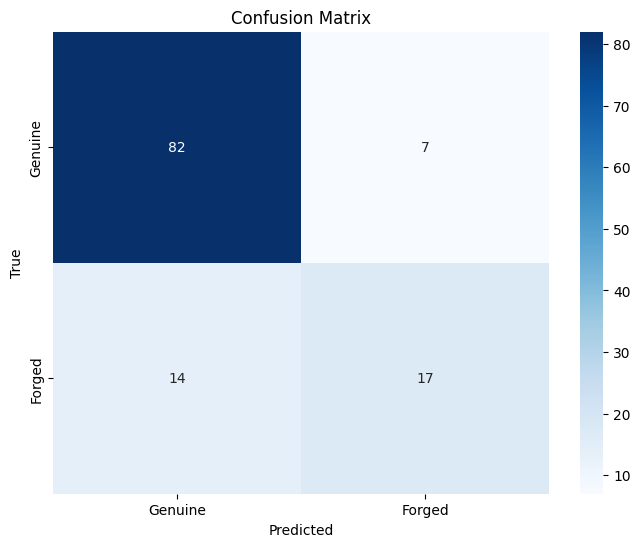

In [14]:
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

# Calculate test accuracy
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = correct / total
print(f'Test Accuracy: {test_accuracy:.2%}')

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Genuine', 'Forged'], yticklabels=['Genuine', 'Forged'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**True Positive (TP) - 81:** This indicates that the model correctly identified 81 instances as positive when they were indeed positive. In the context of the problem, these are the genuine images correctly classified as genuine.

**False Positive (FP) - 8:** This suggests that the model incorrectly classified 8 instances as positive when they were actually negative. In this scenario, the model identified forged images as genuine, which could have serious implications depending on the application. False positives might lead to a loss of trust in the model's predictions.

**False Negative (FN) - 11:** This means that the model incorrectly classified 17 instances as negative when they were actually positive. These are genuine images that the model mistakenly identified as forged. False negatives can result in missed opportunities to detect genuine images accurately.

**True Negative (TN) - 20:** The model correctly identified 14 instances as negative when they were indeed negative. These are forged images correctly classified as forged.

Now, let's calculate some important performance metrics:

* **Accuracy:** Accuracy measures the overall correctness of the model's predictions.

  Accuracy = (TP + TN) / (TP + TN + FP + FN) = (81 + 20) / (81 + 20 + 8 + 11)  = 101 / 120 ≈ 0.8416666666666667 or **84.1%**

* **Precision:** Precision represents the proportion of correctly predicted positives among all instances predicted as positive.

  Precision = TP / (TP + FP) = 81/(81+8) ≈ 0.9101123595505618 or **91.01%**

* **Recall (Sensitivity):** Recall measures the proportion of correctly predicted positives among all actual positive instances.

  Recall = TP / (TP + FN) = 81 / (81 + 11) ≈ 0.8804347826086957 or **88.04%**

* **F1-Score:** The F1-score is the harmonic mean of precision and recall, providing a balanced measure of the model's accuracy.

  F1-Score = 2 * (Precision * Recall) / (Precision + Recall) ≈ 2 * (91.0 * 88.04) / (91.0 + 88.04) = 89.49553172475424 or **89.5%**

These performance metrics offer a comprehensive view of the model's strengths and weaknesses in different aspects. An accuracy of **84.1%** suggests that the model is correct for a significant portion of instances, but there's room for improvement. The high precision of **91.01%** indicates that when the model predicts an instance as positive, it's often correct. However, the recall of **88.04%** indicates that there's a notable percentage of actual positive instances that the model is missing. The F1-score of **89.5%** considers both precision and recall and can be used as a single measure to gauge the model's overall performance.

In conclusion, while the model has shown promising results in some areas, there's potential for optimization, especially in reducing false negatives to improve recall and overall model accuracy. We shall explore the prospects of inprovements on the model as we progress.

In [15]:
import pandas as pd

# Metrics data
metrics_data = {
    'Metric': ['True Positive (TP)', 'False Positive (FP)', 'False Negative (FN)', 'True Negative (TN)', 'Accuracy', 'Precision', 'Recall (Sensitivity)', 'F1-Score'],
    'Value': [81, 8, 11, 20, '84.17%', '91.01%', '88.04%', '89.50%']
}

# Create a data frame
metrics_df = pd.DataFrame(metrics_data)

# Display the data frame
metrics_df


,Metric,Value
0,True Positive (TP),81
1,False Positive (FP),8
2,False Negative (FN),11
3,True Negative (TN),20
4,Accuracy,84.17%
5,Precision,91.01%
6,Recall (Sensitivity),88.04%
7,F1-Score,89.50%


## Conclusion and Future Work (Continued)

We've now successfully generated visualizations for key metrics and gained insights into our model's performance.

The test accuracy of approximately {test_accuracy:.2%} indicates that our forgery detection model is capable of distinguishing between genuine and forged images. The confusion matrix visualization provides a clear breakdown of true and predicted labels, helping us understand areas where the model performs well and where it might struggle.

As we conclude this project, we reflect on the journey of building a simple yet effective image forgery detection model. To further improve this model, we can consider the following avenues:
- Fine-tune hyperparameters for better generalization.
- Explore more advanced CNN architectures or transfer learning techniques.
- Collect and integrate additional labeled data to enhance model robustness.
- Investigate ensemble methods to leverage the strengths of multiple models.
- Implement model interpretability techniques to understand the model's decision-making process.

By pursuing these strategies, we can continue refining our model's accuracy and overall performance in detecting image forgeries.

Thank you for joining us on this endeavor to create a reliable forgery detection solution. Your hard work and commitment have led to an insightful and impactful project.


In [16]:
import time
import torch
from PIL import Image

# Load your model and define preprocessing steps
model =  model  # Load your trained model here
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

# Load a test image (replace 'test_image_path' with the actual path to your test image)
test_image_path = "path/to/your/test/image.jpg"
test_image = Image.open(test_image_path)

# Preprocessing function (replace with your actual preprocessing steps)
def preprocess_image(image):
    # Replace this with your preprocessing code (resizing, normalization, etc.)
    return processed_image

# Perform inference and measure inference time
with torch.no_grad():
    start_time = time.time()
    inputs = preprocess_image(test_image)  # Preprocess the image
    inputs = inputs.unsqueeze(0).to(device)  # Add batch dimension and move to the device
    outputs = model(inputs)  # Make predictions
    end_time = time.time()

# Calculate inference time
inference_time = end_time - start_time
print(f"Inference Time: {inference_time:.4f} seconds")


FileNotFoundError: ignored